In [49]:
#repo https://github.com/CVandermies/AI_introduction

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# In TensorFlow 2, you can compile a function into a TensorFlow graph by using a simple decorator :

m = tf.Variable(1.0, name='m')
p = tf.Variable(1.0, name='p')

@tf.function
def linear(x):
	return m*x + p

# tf.functions take tf.Tensor as arguments
# with scalar
tf.print(linear(tf.constant(1.0)))

# and with list
tf.print(linear(tf.constant([2.0, 3.0, 6.0])))

2
[3 4 7]


In [51]:
# Train the model : the loss function (evaluate the likeliness between predictions and expected values)

@tf.function
def loss_function(expected_output, output):
	return (expected_output - output) ** 2

# Compute gradient of x² for x = 3
x = tf.Variable(4.0)

with tf.GradientTape() as tape:
	y = x**2

dy_dx = tape.gradient(y, x)
tf.print(dy_dx)     # print 6

8


In [52]:
@tf.function
def train_step(input_value, expected_output):
	with tf.GradientTape() as tape:
		loss = loss_function(expected_output, linear(input_value))
	grads = tape.gradient(loss, [m, p])

	# We descent of 1 hundredth of the gradient
	m.assign_sub(0.01*grads[0])
	p.assign_sub(0.01*grads[1])

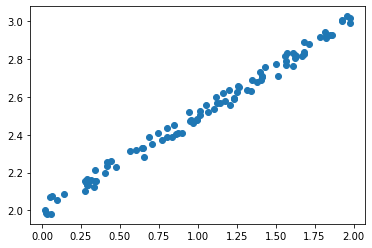

In [53]:
# tf.functions expect float32
# we create 100 data points
# we use m=0.5 and p=2
input_values = np.float32(np.random.rand(100)*2)
expected_outputs = np.float32(0.5*input_values + 2 + (np.random.rand(100)*0.1-0.05))

# display data points
plt.scatter(input_values, expected_outputs, label='data')
plt.show()

In [54]:
input_values_batches = np.reshape(input_values, (10, 10))
expected_outputs_batches = np.reshape(expected_outputs, (10, 10))

p = 1.98777449
m = 0.514456451


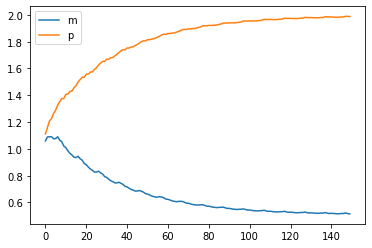

In [55]:
# We'll record values for p and m to plot their evolutions
p_values = []
m_values = []
for epoch in range(15):
	for input_value, expected_output in zip(input_values_batches, expected_outputs_batches):
		train_step(input_value, expected_output)
		p_values.append(p.numpy())
		m_values.append(m.numpy())

# display final values
tf.print('p =', p)   # p = 1.97727704
tf.print('m =', m)   # m = 0.521407127

# plot values evolution during the training
plt.plot(m_values, label='m')
plt.plot(p_values, label='p')
plt.legend()
plt.show()

In [56]:
# En simplifiant:

class Linear(tf.keras.Model):
	def __init__(self):
		super(Linear, self).__init__()
		self.m = tf.Variable(1.0, name='m')
		self.p = tf.Variable(1.0, name='p')

	def call(self, x):
		return self.m * x + self.p

model = Linear()

Epoch 1/15
10/10 [==============================] - 0s 1ms/step - loss: 0.1859
Epoch 2/15
10/10 [==============================] - 0s 1ms/step - loss: 0.0812
Epoch 3/15
10/10 [==============================] - 0s 2ms/step - loss: 0.0477
Epoch 4/15
10/10 [==============================] - 0s 1ms/step - loss: 0.0295
Epoch 5/15
10/10 [==============================] - 0s 2ms/step - loss: 0.0147
Epoch 6/15
10/10 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 7/15
10/10 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 8/15
10/10 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 9/15
10/10 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 10/15
10/10 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 11/15
10/10 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 12/15
10/10 [==============================] - 0s 2ms/step - loss: 0.0011
Epoch 13/15
10/10 [==============================

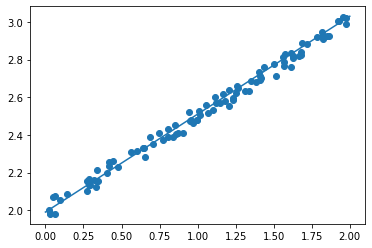

In [57]:
model.compile(
	optimizer = tf.keras.optimizers.SGD(0.1),
	loss=tf.keras.losses.MeanSquaredError()
)

model.fit(
	input_values,
	expected_outputs,
	batch_size = 10,
	epochs = 15
)

tf.print("model.m=", model.m)
tf.print("model.p=", model.p)

plt.scatter(input_values, expected_outputs, label='data')
plt.plot([0, 2], [model.p, model.m*2+model.p])
plt.show()

In [58]:
################
# Partie MNIST #
################

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model

In [59]:
# Charger et préparer le jeu de données MNIST

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis].astype("float32")
x_test = x_test[..., tf.newaxis].astype("float32")

In [60]:
# Utiliser tf.data pour tf.data et mélanger l'ensemble de données:

train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [61]:
 # Créer le modèle tf.keras à l'aide de l' API de sous-classification du modèle Keras:
 
 class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10)

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

# Create an instance of the model
model = MyModel()

In [62]:
# Choisir un optimiseur et une fonction de perte pour l'entraînement:

loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

In [63]:
# Sélectionner des métriques pour mesurer la perte et la précision du modèle.
# Ces métriques accumulent les valeurs au fil des époques, puis impriment le résultat global.

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [64]:
# Utiliser tf.GradientTape pour entraîner le modèle:

@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [65]:
# Tester le modèle:

@tf.function
def test_step(images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [66]:
EPOCHS = 5

for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  print(
    f'Epoch {epoch + 1}, '
    f'Loss: {train_loss.result()}, '
    f'Accuracy: {train_accuracy.result() * 100}, '
    f'Test Loss: {test_loss.result()}, '
    f'Test Accuracy: {test_accuracy.result() * 100}'
  )

Epoch 1, Loss: 0.14161892235279083, Accuracy: 95.81666564941406, Test Loss: 0.06076433137059212, Test Accuracy: 97.95999908447266
Epoch 2, Loss: 0.0450141616165638, Accuracy: 98.57166290283203, Test Loss: 0.05423500016331673, Test Accuracy: 98.18999481201172
Epoch 3, Loss: 0.022243330255150795, Accuracy: 99.288330078125, Test Loss: 0.06637278199195862, Test Accuracy: 98.13999938964844
Epoch 4, Loss: 0.014920318499207497, Accuracy: 99.51166534423828, Test Loss: 0.06631532311439514, Test Accuracy: 98.12999725341797
Epoch 5, Loss: 0.00861718226224184, Accuracy: 99.70333862304688, Test Loss: 0.07533921301364899, Test Accuracy: 98.1199951171875
